In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Titanic-Dataset.csv')


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
print(data.head())
print(data.info())
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data.dropna(subset=['Fare'], inplace=True)


<ipython-input-5-f539d3f2d36c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-5-f539d3f2d36c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Male: 1, Female: 0
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])


In [ ]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_acc)


Logistic Regression Accuracy: 0.8044692737430168


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8212290502793296


In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.7821229050279329


In [ ]:
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)
best_model = max(zip([log_acc, rf_acc, svm_acc], ['Logistic Regression', 'Random Forest', 'SVM']))
print("Best Model:", best_model[1], "with Accuracy:", best_model[0])


Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8212290502793296
SVM Accuracy: 0.7821229050279329
Best Model: Random Forest with Accuracy: 0.8212290502793296


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



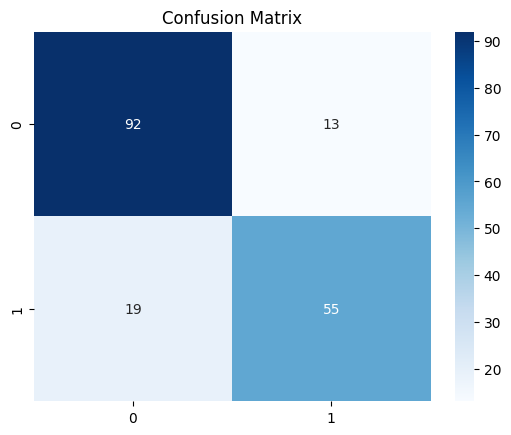

In [ ]:
if best_model[1] == "Logistic Regression":
    final_model = log_model
    y_pred_final = y_pred_log
elif best_model[1] == "Random Forest":
    final_model = rf_model
    y_pred_final = y_pred_rf
else:
    final_model = svm_model
    y_pred_final = y_pred_svm

print("Classification Report:\n", classification_report(y_test, y_pred_final))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
user_input = []
for feature in feature_names:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)
user_input_df = pd.DataFrame([user_input], columns=feature_names)
user_input_scaled = scaler.transform(user_input_df)
survival_prediction = final_model.predict(user_input_scaled)

if survival_prediction[0] == 1:
    print("The passenger survived.")
else:
    print("The passenger did not survive.")

Enter Pclass: 3
Enter Sex: 0
Enter Age: 24
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 12.5
Enter Embarked: 2
The passenger did not survive.
